**Modeling**

-the analyzing and comparing the capacity and utilization rates of COVID-19 assessment centers across different regions using regression models Linear Regression, Decision Tree Regression, and Random Forest Regression.

-using these numerical attributes,showing that the MSE and R-squared values for the **linear regression model**. Lower MSE values indicate better predictive performance, while higher R-squared values indicate a better fit of the model to the data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Load the dataset
df = pd.read_csv('cleaned_assessment_centre_locations.csv')

In [2]:
X = df[['testing_enrolled', 'location_id', 'latitude', 'longitude', 'appointments', 
        'phone_appointments', 'symptomatic', 'drive_through', 'accessible', 
        'walk_ins', 'children_under_2', 'public_transit', 'french_language_services', 
        'free_parking', 'general_population', 'asl_interpretation', 'first_nations', 
        'community_lab', 'vaccine_enrolled', 'pharmacy']]

In [3]:
# target variable
y = df['latitude']

In [4]:
# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression MSE:", lr_mse)
print("Linear Regression R-squared:", lr_r2)


Linear Regression MSE: 5.048709793414476e-29
Linear Regression R-squared: 1.0


In [7]:
# 2. Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree Regression MSE:", dt_mse)
print("Decision Tree Regression R-squared:", dt_r2)


Decision Tree Regression MSE: 3.1950510427741724e-05
Decision Tree Regression R-squared: 0.9999743867668272


In [8]:
# 3. Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regression MSE:", rf_mse)
print("Random Forest Regression R-squared:", rf_r2)


Random Forest Regression MSE: 3.0713656750996857e-05
Random Forest Regression R-squared: 0.9999753782946994


In [9]:
# Dictionary to store results
results = {'Model': [], 'MSE': [], 'R-squared': []}

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
results['Model'].append('Linear Regression')
results['MSE'].append(lr_mse)
results['R-squared'].append(lr_r2)

# 2. Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
results['Model'].append('Decision Tree Regression')
results['MSE'].append(dt_mse)
results['R-squared'].append(dt_r2)

# 3. Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
results['Model'].append('Random Forest Regression')
results['MSE'].append(rf_mse)
results['R-squared'].append(rf_r2)



In [10]:
# Creating a DataFrame to store results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                      Model           MSE  R-squared
0         Linear Regression  4.981244e-29   1.000000
1  Decision Tree Regression  3.195051e-05   0.999974
2  Random Forest Regression  3.071366e-05   0.999975


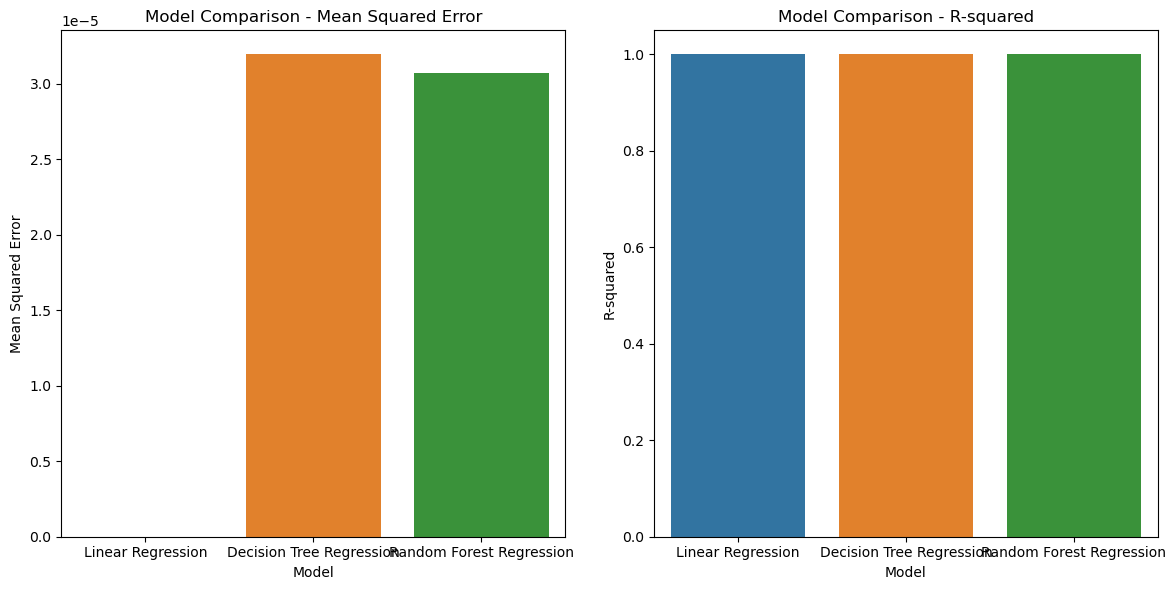

In [11]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Model Comparison - Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')

# Plot R-squared
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R-squared', data=results_df)
plt.title('Model Comparison - R-squared')
plt.xlabel('Model')
plt.ylabel('R-squared')

# Display the plots
plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import cross_val_score

# Example for Linear Regression
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

# 10-fold cross-validation for MSE
cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='neg_mean_squared_error')
print("Linear Regression CV MSE:", -cv_scores.mean())
print("Linear Regression CV Std Dev:", cv_scores.std())


Linear Regression CV MSE: -0.0
Linear Regression CV Std Dev: 0.0
